In [4]:
import librosa
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [5]:
SAMPLE_RATE = 44100

In [6]:
# Path
files_form = "*.wav"
back_path = "/Users/junhyuckwoo/capstone/TestFile/ProceedData/background_t_44100_1s/" + files_form
drone1_path = "/Users/junhyuckwoo/capstone/TestFile/ProceedData/syma_t_44100_1s/" + files_form
drone2_path = "/Users/junhyuckwoo/capstone/TestFile/ProceedData/mavic_t_44100_1s/" + files_form
drone3_path = "/Users/junhyuckwoo/capstone/TestFile/ProceedData/phantom2_t_44100_1s/" + files_form
print("Background Path: ", back_path)
print("Syma Path: ", drone1_path)
print("Mavic Path: ", drone2_path)
print("Phantom2 Path: ", drone3_path)

Background Path:  /Users/junhyuckwoo/capstone/TestFile/ProceedData/background_t_44100_1s/*.wav
Syma Path:  /Users/junhyuckwoo/capstone/TestFile/ProceedData/syma_t_44100_1s/*.wav
Mavic Path:  /Users/junhyuckwoo/capstone/TestFile/ProceedData/mavic_t_44100_1s/*.wav
Phantom2 Path:  /Users/junhyuckwoo/capstone/TestFile/ProceedData/phantom2_t_44100_1s/*.wav


In [7]:
back_files = glob.glob(back_path)
drone1_files = glob.glob(drone1_path)
drone2_files = glob.glob(drone2_path)
drone3_files = glob.glob(drone3_path)
files_num = min(len(back_files), len(drone1_files), len(drone2_files), len(drone3_files))
print("# Background: ", len(back_files))
print("# Syma: ", len(drone1_files))
print("# Mavic: ", len(drone2_files))
print("# Phantom2: ", len(drone3_files))
print("# Files: ", files_num)    

# Background:  10014
# Syma:  5473
# Mavic:  3787
# Phantom2:  5240
# Files:  3787


In [8]:
dump = [back_files, drone1_files, drone2_files, drone3_files]
input_data = [[],[],[],[]]
y = [[],[],[],[]]
files_num = [10014,3787,3787,3787]

In [9]:
for i in range(4):
    for j in range(files_num[i]):    
        raw, sr = librosa.load(dump[i][j], sr=SAMPLE_RATE)
        norm = maxabs_scale(raw)
        buf = librosa.feature.mfcc(norm, sr=44100, n_mfcc=13).T
        if j==0:
            input_data[i] = buf
        else:        
            input_data[i] = np.concatenate((input_data[i], buf))
print("Bee shape:  ", input_data[0].shape)
print("Drone shape1: ", input_data[1].shape)
print("Drone shape2: ", input_data[2].shape)
print("Drone shape3: ", input_data[3].shape)

Bee shape:   (871218, 13)
Drone shape1:  (327178, 13)
Drone shape2:  (329469, 13)
Drone shape3:  (329469, 13)


In [10]:
for i in range(4):
    y[i] = np.ones(len(input_data[i]))*i
    print("y" ,i, y[i].shape)

y 0 (871218,)
y 1 (327178,)
y 2 (329469,)
y 3 (329469,)


In [11]:
train0, test0, tr_y0, te_y0 = train_test_split(input_data[0], y[0], test_size=0.2, shuffle=True)
train1, test1, tr_y1, te_y1 = train_test_split(input_data[1], y[1], test_size=0.2, shuffle=True)
train2, test2, tr_y2, te_y2 = train_test_split(input_data[2], y[2], test_size=0.2, shuffle=True)
train3, test3, tr_y3, te_y3 = train_test_split(input_data[3], y[3], test_size=0.2, shuffle=True)

In [12]:
train = train0
test = test0
tr_y = tr_y0
te_y = te_y0

In [13]:
train = np.concatenate((train, train1))
train = np.concatenate((train, train2))
train = np.concatenate((train, train3))

test = np.concatenate((test, test1))
test = np.concatenate((test, test2))
test = np.concatenate((test, test3))

In [14]:
tr_y = np.concatenate((tr_y, tr_y1))
tr_y = np.concatenate((tr_y, tr_y2))
tr_y = np.concatenate((tr_y, tr_y3))

te_y = np.concatenate((te_y, te_y1))
te_y = np.concatenate((te_y, te_y2))
te_y = np.concatenate((te_y, te_y3))

In [15]:
print(train.shape)
print(test.shape)
print(tr_y.shape)
print(te_y.shape)

(1485866, 13)
(371468, 13)
(1485866,)
(371468,)


In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, warm_start=True)

In [26]:
rfc.fit(train, tr_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

In [27]:
x = test
y = te_y

In [28]:
prediction = rfc.predict(x)

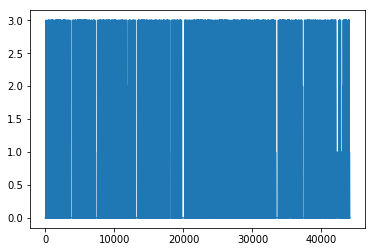

In [29]:
plt.plot(prediction[:44100])

In [30]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

p,r,f,s = precision_recall_fscore_support(y, prediction, average='micro')

print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(y, prediction))
print(classification_report(y, prediction))
print(confusion_matrix(y, prediction))

F-Score: 0.972
Accuracy:  0.9721456491541667
             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97    174244
        1.0       0.99      0.98      0.99     65436
        2.0       0.99      0.99      0.99     65894
        3.0       0.96      0.92      0.94     65894

avg / total       0.97      0.97      0.97    371468

[[171368    357    268   2251]
 [   989  64325     50     72]
 [   367     20  65115    392]
 [  5171     36    374  60313]]


In [31]:
from sklearn.externals import joblib

In [32]:
joblib.dump(rfc, "11112018_randomforest_warm.pkl")

['11112018_randomforest_warm.pkl']